# Tarea Variables aleatorias discretas

In [1]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos 

import random # para generar numeros aleatorios

## Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_1,...,x_n\}$ si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
0, \quad \text{e.o.c} \end{cases}$$

Se llama uniforme porque cada uno de sus posibles resultados de $X$ tienene la misma probabilidad.

**Notación:** $X\sim Unif(x_1,...,x_n)$

La esperanza y varianza de $X$, están dadas por:

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y 
$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

La función de distribución de una v.a. uniforme es:
$$ F_X(x) = \mathbb{P}(X\le x) = \begin{cases} 0, \quad \text{si } x < x_1 \\ \frac{x}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
1, \quad \text{si } x > x_n \end{cases}$$

**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$

Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces
$$ \mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2 $$

Para más información, ver [Matplotlib colores](https://matplotlib.org/stable/gallery/color/named_colors.html)

### Gráfica de la distribución Uniforme Discreta

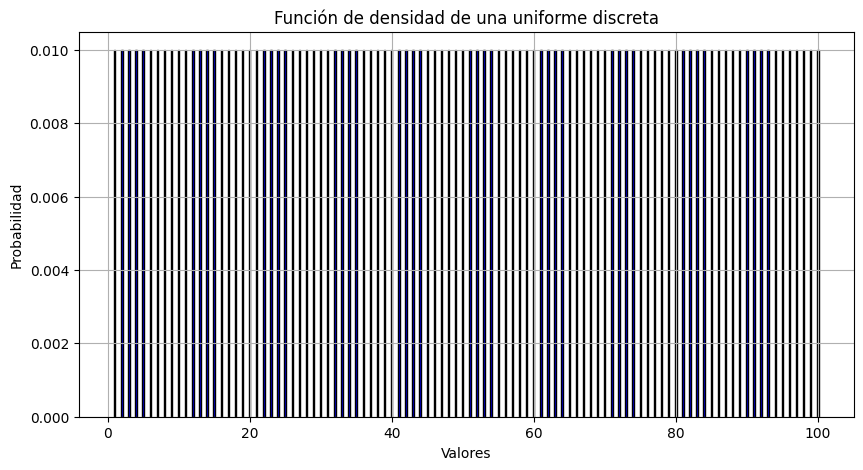

In [2]:
# Definir el rango de la distribución uniforme discreta [low, high)
low = 1 #límite inferior
high = 100 #límite superior

#Crear los valores posibles dentro del rango
x = np.arange(low, high+1)

#Calcular la función de masa de probabilidad
pmf = np.full_like(x, 1/ (high+1-low) , dtype = float ) 

#Para crear una figura más grande
plt.figure(figsize=(10, 5))

#Graficar pmf
plt.bar(x, pmf, width=0.2, color='b', edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una uniforme discreta')
plt.grid(True)
plt.show() #mostrar el gráfica


$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria uniforme.

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$


In [3]:
(x[-1] + x[0]) / 2

np.float64(50.5)

In [4]:
sum(x * pmf)

np.float64(50.5)

$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

In [5]:
sum(((x-sum(x * pmf)) ** 2) * pmf)

np.float64(833.2499999999999)

In [6]:
(((x[-1] - x[0] + 1) ** 2) - 1) / 12

np.float64(833.25)

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.    

$$ \mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2 $$

In [7]:
sum([px for x,px in zip(x,pmf) if x > 80])

np.float64(0.20000000000000004)

## Variable aleatoria Bernoulli con parámetro $p\in (0,1)$

Este modelo se aplica a un experiemento cuyo espacio muestral tiene dos resultados
$$ \Omega = \{\text{éxito} , \text{fracaso}\}$$
y definimos 
- $X(\{\text{éxito}\}) =1$
- $X(\{\text{fracaso}\}) =0$

Las probabilidades asociadas a este modelo son
- $\mathbb{P}(\{\text{éxito}\}) = p$
- $\mathbb{P}(\{\text{fracaso}\}) = 1-p$
donde $0<p<1$.

La función de densidad, está definida de la siguiente manera
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} p^x(1-p)^{1-x}, \quad \text{si } x\in \{0,1\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim Ber(p)$

Mediante la combinación de v.a. Bernoulli es posible construir otras v.a.

La esperanza y varianza de $X\sim Ber(p)$, esá dada por:

$$ \mathbb{E}[X] =\sum_{x=0}^{1} x f_{X}(x) = 0\cdot (1-p) + 1 \cdot p = p $$
y
$$ \mathbb{E}[X^2] =\sum_{x=0}^{1} x^2 f_{X}(x) = 0^2 \cdot (1-p) + 1^2 \cdot p = p $$
entonces
$$ \text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2  = p - p^2 = p(1-p)$$

Para más información, ver [Bernoulli](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)

### Gráfica de la distribución Bernoulli

La función de densidad =  [0.7 0.3]


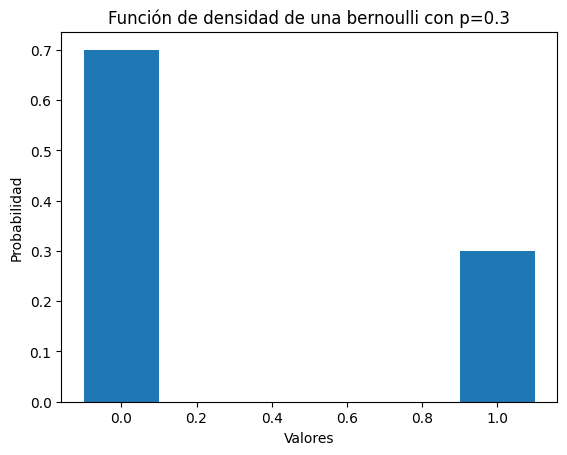

La esperanza es =  0.3
La varianza es =  0.21


In [8]:
from scipy.stats import bernoulli

#Definimos nuestra probabilidad de éxito
p=0.3

#Defino los posibles valores 
x=[0,1]

#Calculamos la función de densidad
pmf = bernoulli.pmf(x, p)

print("La función de densidad = ", pmf)

#Graficamos la función de densidad
plt.bar(x,pmf,width=0.2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una bernoulli con p=0.3')
#plt.grid(True)
plt.show() #mostrar el gráfica

#Calculo de la esperanza 
print("La esperanza es = ", bernoulli.mean(p))

#Calculo de la varianza 
print("La varianza es = ", bernoulli.var(p))

## Variable aleatoria Binomial con parámetros $n$ y $p\in(0,1)$

Decimos que una v.a. $X$ tiene distribución binomial con parámetros $n$ y $p$, si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text{si } x\in \{0,1,...,n\} \\
0, \quad \text{e.o.c} \end{cases}$$
donde $n\in\mathbb{Z}_{+}$ y $0<p<1$.

**Obs:** Los ensayos deben ser independientes. 

La esperanza de $X$ es
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x \mathop = 0}^n x \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 1}^n x \binom n x p^x (1-p)^{n - x}\\
&= \sum_{x \mathop = 1}^n n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{( {n - 1}) - ( {x - 1}) }\\
&=n p \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\\
&=np.
\end{align*}$$
y 
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x \mathop = 0}^n x^2 \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 0}^n x n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n x \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{({n - 1}) - ({x - 1}) }\\
&= n p \sum_{j \mathop = 0}^m ({j + 1}) \binom m j p^j (1-p)^{m - j}\\
&=n p \left( {\sum_{j \mathop = 0}^m j \binom m j p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&=n p \left( {\sum_{j \mathop = 0}^m m \binom {m - 1} {j - 1} p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&= n p \left( (n - 1) p \sum_{j \mathop = 1}^m \binom {m - 1}{j - 1} p^{j - 1} (1-p)^{( {m - 1}) - ({j - 1}) } + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\right) \\
&= n p \left( (n - 1) p (p + (1-p))^{m - 1} + (p + (1-p))^m\right)\\
&= n p ((n - 1) p + 1)\\
&= (np)^2 +np(1-p),
\end{align*} $$

Por lo que la varianza de $X$ es
$$\text{Var}(X) = np(1-p) $$

**Ejemplo** Una moneda justa se tira seis veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de veces que cae sol, entonces dabemos que $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Calcular:

- $\mathbb{P}(X=2) = \binom{6}{2}(0.3)^2 (1-p)^{6-2} = 0.3241$
- $\mathbb{P}(X=3) = \binom{6}{3}(0.3)^3 (1-p)^{6-3} = 0.1852$
- $$ \begin{align*} \mathbb{P}(1<X \le 5) &= \mathbb{P}(X=2) + \mathbb{P}(X=3) \mathbb{P}(X=4) + \mathbb{P}(X=5) \\
    &= 0.3241 + 0.1852 + \binom{6}{4}(0.3)^4 (1-p)^{6-4} + \binom{6}{5}(0.3)^5 (1-p)^{6-5}  \\
    &= 0.579 \end{align*} $$

Para más información, ver [Binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

Notemos que $\mathbb{P}(1<X\le 5) = F_X(5) - F_X(1) $

Usamos el atributo `.cdf ` para calcular estas probabilidades

In [9]:
from scipy.stats import binom
print(binom.cdf(5,6,0.3)) # calcula la probabilidad acumulada de que haya 5 o menos éxitos en 6 ensayos
print(binom.cdf(1,6,0.3)) # calcula la probabilidad acumulada de que haya 1 o menos éxitos en 6 ensayos
print(binom.cdf(5,6,0.3)-binom.cdf(1,6,0.3)) # calcula la probabilidad deseada

0.999271
0.4201749999999998
0.5790960000000003


### Gráfica de la distribución Binomial

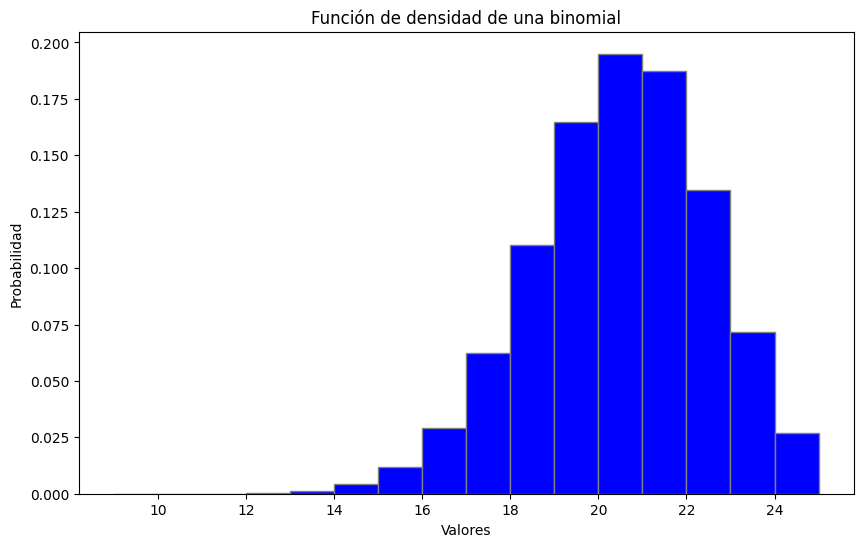

In [10]:
n = 25 # número de ensayos bernoulli
p = 0.8 # probabilidad de éxito
s= 100000 # número de muestras

#Vamos a generar numeros aleatorios que siguen una distribución binomial
binom_numeros = sps.binom.rvs(n,p,size=s) 

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(binom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey" 
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una binomial')
#plt.grid(True)
plt.show() #mostrar el gráfica

## Variable aleatoria Poisson

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$. 

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$, 

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*} $$

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.


In [11]:
from scipy.stats import poisson
lamb = 2

$$ \mathbb{P}(X>2) $$

In [12]:
1-poisson.cdf(2,lamb)

np.float64(0.3233235838169366)

$$ \mathbb{P}(X>2 \mid X \ge 1) $$

In [13]:
(1-poisson.cdf(2,lamb))/(1-poisson.cdf(.99,lamb))

np.float64(0.37392942900133747)

### Aproximación de Poisson a la Binomial
La distribución de Poisson es una forma límite de la distribución binomial, es decir, es una buena aproximación cuando $n$ es suficientemente grande y $p$ suficientemente pequeña.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesión de números reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribución de Poisson ofrece un modelo probabilístico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que sólo hay dos posibles resultados: éxito o fracaso, con probabilidad de 	éxito pequeña, y en los que el interés se centra en conocer el número de éxitos obtenidos al realizar el experimento un número suficientemente grande de veces.

Empíricamente se ha establecido, que la aproximación se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo** Supongamos que la probabilidad de que un producto producido por cierta máquina es defectuoso es de $0.1$. ¿Cuál es la probabilidad de que un lote de 10 productos contenga a lo más un producto defectuoso?

Sea $X$ el número de productos defectuosos, y sabemos que $X$ tiene una distribución binomial con parámetros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribución Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

### Gráfica de la aproximación de la binomial a la Poisson

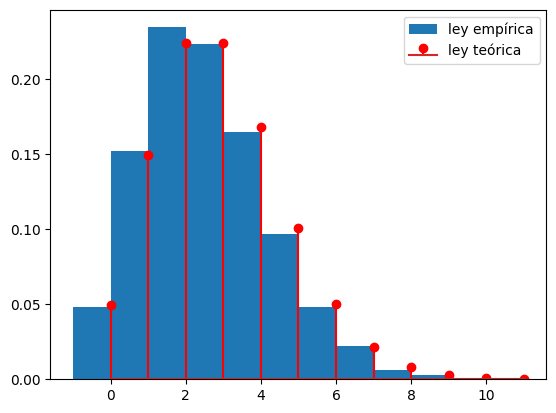

In [14]:
# Simulación de la aproximación de la Bonomial a la Poisson
param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el número de ensayos en la distribución binomial
N=5000 # Este es el número de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribución binomial con parámetros:
# n = 1000 (número de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la función de masa de probabilidad (FMP) de la distribución Poisson teórica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()


## Variable aleatoria Geométrica con parámetro $p\in (0,1)$.

Esta variable aleatoria cuenta el número de fracasos antes del primer éxito en ensayos bernoulli independientes con parámetro $0<p<1$, y su función de masa de probabilidades está dada por:
$$f_{X}(x)=\begin{cases}
	p(1-p)^{x-1} &\quad \text{si } x=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


**Notación:** $X\sim Geo(p)$

La cual es una función de densidad ya que:
* $0\le f_{X}(x)\le 1$ para toda $x$.
* $$\begin{align*}
	\sum_{x\in R_{X}}f_{X}(x) &= \sum_{x=1}^{\infty}(1-p)^{x-1}p \\
	&= p\sum_{y=0}^{\infty}(1-p)^{y} \\
	&= p\left(\frac{1}{1-(1-p)}\right) = 1
    \end{align*}$$

Si por el contrario queremos contar el número de éxitos antes del primer fracaso, tenemos que la función de está dada por:
$$f_{X}(x)=\begin{cases}
	p^{x}(1-p) &\quad \text{si } x=0,1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

Para calcular la esperanza y varianza de $X$, necesitamos del siguiente lema:

**Lema 1.** Sea $x$ un número real tal que $│x│<1$. Entonces,
$$\sum_{k=1}^{\infty}kx^{k-1}=\frac{1}{(1-x)^2}.$$
**Demostración.** Se tiene que
$$\frac{d}{dx}\sum_{k=1}^{\infty}x^{k}=\sum_{k=1}^{\infty}kx^{k-1}.$$
Además,
$$\sum_{k=1}^{\infty}x^{k}=\frac{x}{1-x}.$$
Por lo tanto,
$$\frac{d}{dx}\frac{x}{1-x}=\frac{1}{(1-x)^2}.$$

Como corolario,
$$\sum_{k=1}^{\infty}k(k+1)x^{k-1}=\frac{2}{(1-x)^2}.$$
En efecto,
$$\frac{d}{dx}\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{k=1}^{\infty}k(k+1)x^{k-1}.$$
Ahora,
$$\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{m=2}^{\infty}mx^{m-1}=\frac{1}{(1-x)^2}-1.$$

Usando estos resultados, se tiene que la esperanza de $X$ es:
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x=1}^{\infty} x p(1-p)^{x - 1}\\
&= p \frac 1 {(1 - (1-p))^2}\\
&=  \frac p {p^2}\\
&=\frac{1}{p}
\end{align*}$$
y calculamos,
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x=1}^{\infty} x^{2}p(1-p)^{x-1}\\
&=\sum_{x=1}^{\infty}x(x+1)(1-p)^{x-1}p-\sum_{x=1}^{\infty}p(1-p)^{x-1}
\end{align*}$$

Por el Lema 1, se tiene
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$

Por lo tanto,
$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

### Gráfica de la distribución geométrica

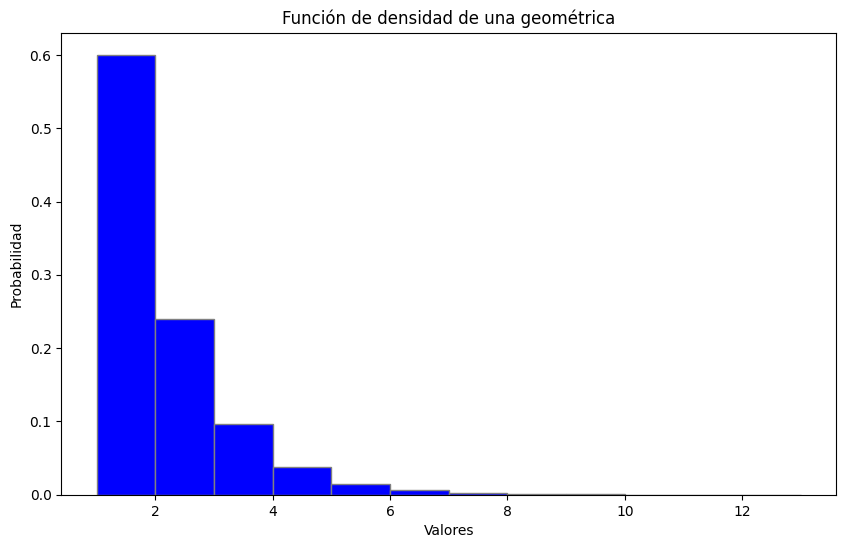

In [15]:
p = 0.6 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
geom_numeros = sps.geom.rvs(p,size=s) 

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    geom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(geom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey" 
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una geométrica')
plt.show() #mostrar el gráfica

## Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=\begin{cases}
	\binom{x-1}{r-1}p^{r}(1-p)^{x-r} &\quad \text{si } x=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{BN}(r,p)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{r}{p}$$
y
$$ \text{Var}[X]=\frac{r(1-p)}{p^2}.$$

### Gráfica de la distribución Binomial Negativa

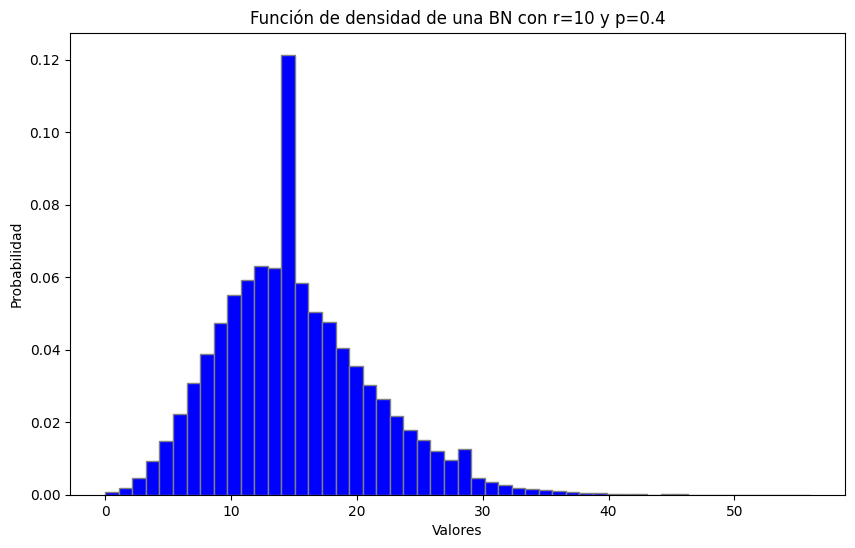

In [16]:
r = 10  
p = 0.4 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
nbinom_numeros = sps.nbinom.rvs(r,p,size=s) 

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(nbinom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey" 
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una BN con r=10 y p=0.4')
plt.show() #mostrar el gráfica

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?

In [17]:
from scipy.stats import nbinom
nbinom.pmf(4-1,1,0.7)

np.float64(0.018900000000000004)

In [18]:
nbinom.pmf(12-10,10,0.7) + nbinom.pmf(12-11,11,0.7) + nbinom.pmf(12-12,12,0.7)

np.float64(0.21891831797499986)


$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

Problema de las Cajas de Fósforos de Banach: Supongamos que un matemático lleva siempre consigo dos cajas de fósforos: una en su bolsillo 

izquierdo y otra en el derecho. Cada vez que necesita un fósforo, tiene la misma probabilidad de tomarlo de cada bolsillo. Supongamos que 

mete la mano en su bolsillo y descubre por primera vez que la caja elegida está vacía. 

Si se asume que cada una de las cajas de fósforos originalmente contenía __N__ fósforos, ¿cuál es la probabilidad de que haya exactamente

__k__ fósforos en la otra caja?

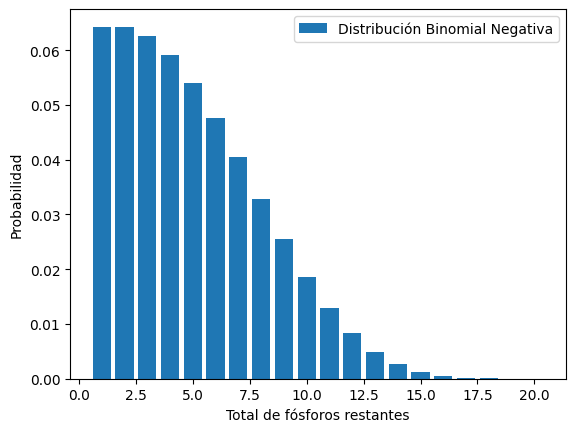

In [19]:
from scipy.stats import nbinom
import matplotlib.pyplot as plt
import numpy as np

N = 20  # Número de fósforos en cada caja inicialmente
p = 0.5  # Probabilidad de tomar un fósforo de una caja en cada intento

# número total de fósforos usados antes de vaciar una caja
k = np.arange(N, 2 * N)

probs = nbinom.pmf(k - N, N, p)

plt.bar(2*N-k, probs, label='Distribución Binomial Negativa')
plt.xlabel('Total de fósforos restantes')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

## Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notación.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la función de densidad

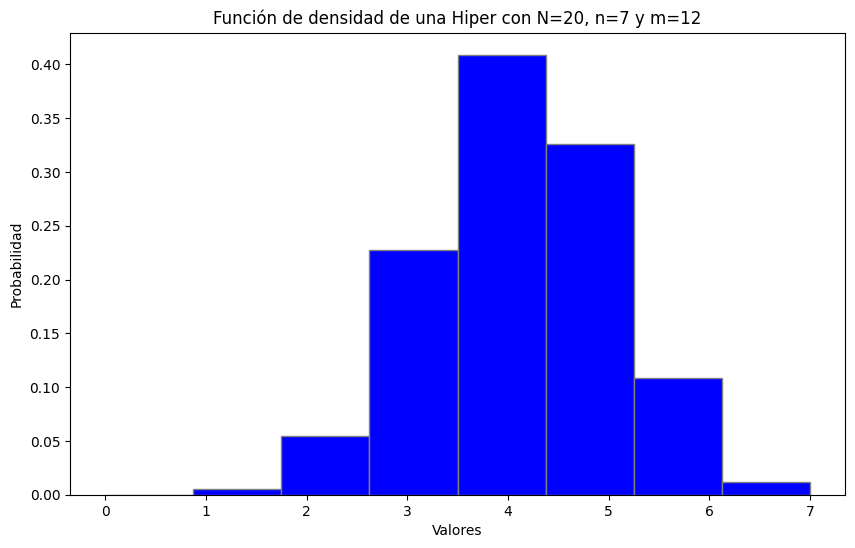

In [20]:
n = 7  
N = 20 # probabilidad de éxito
m = 12
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
nbinom_numeros = sps.hypergeom.rvs(N, n, m,size=s) 

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(nbinom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey" 
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de una Hiper con N={N}, n={n} y m={m}')
plt.show() #mostrar el gráfica

$\color{red}{\text{Ejercicio 7.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?